# <font color=green>1. MEU PRIMEIRO SCRAPING

In [1]:
# <font color=green>1. MEU PRIMEIRO SCRAPING

# 1.1. Introdução

## *Web Scraping* é o termo utilizado para definir a prática de coletar automaticamente informações na Internet. Isto é feito, geralmente, por meio de programas que simulam a navegação humana na Web.

# 1.2. Ambiente e bibliotecas
### Utilizaremos em nosso treinamento o navegador Google Chrome

In [2]:
import bs4
import urllib.request as urllib_request
import pandas

print("BeautifulSoup ->", bs4.__version__)
print("urllib ->", urllib_request.__version__)
print("pandas ->", pandas.__version__)

BeautifulSoup -> 4.6.3
urllib -> 3.7
pandas -> 1.1.5


# 1.3. Meu primeiro scraping

In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = 'https://alura-site-scraping.herokuapp.com/hello-world.php'

response = urlopen(url)
html = response.read()

soup = BeautifulSoup(html, 'html.parser')
#soup     # Pega toda a estrutura do html
print(soup.find('h1', id='hello-world').get_text())
print(soup.find('p').get_text())

Hello World!!!
Web Scraping é o termo utilizado para definir a prática de coletar automaticamente informações na Internet. Isto é feito, geralmente, por meio de programas que simulam a navegação humana na Web.


---
# <font color=green>2. OBTENDO E TRATANDO O CONTEÚDO DE UM HTML

# 2.1. Entendendo a web

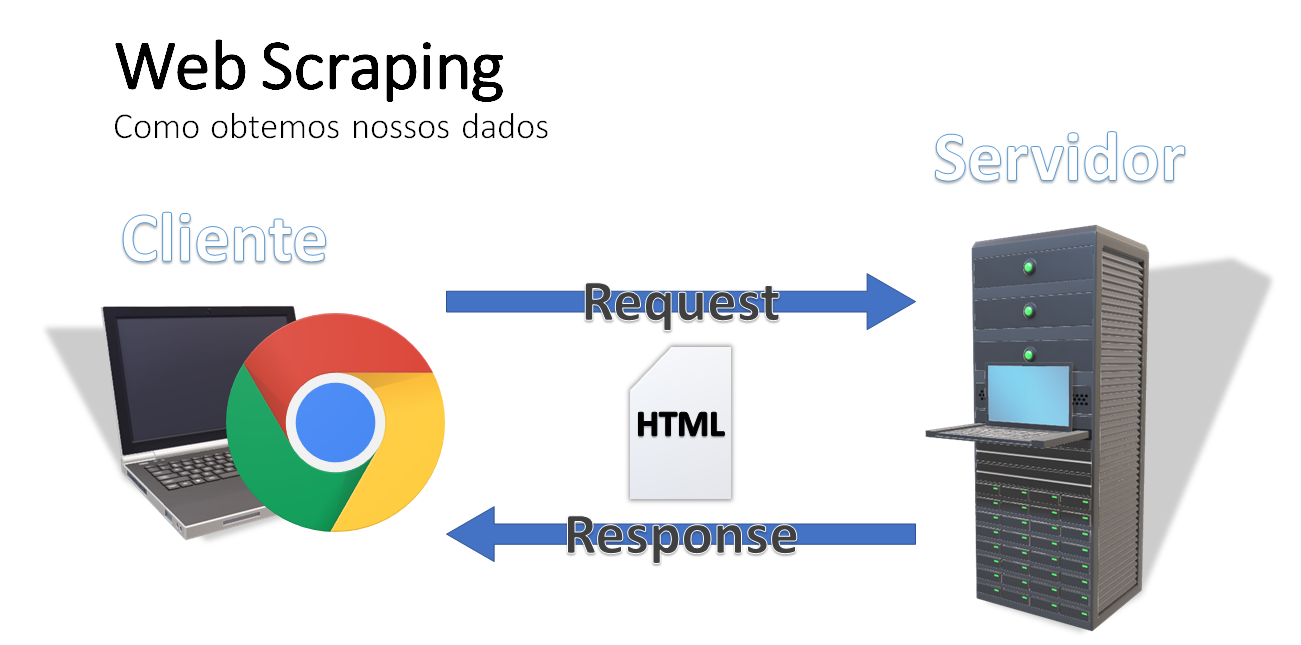

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 2.2. Obtendo o conteúdo HTML de um site

# urllib.request
## https://docs.python.org/3/library/urllib.html

In [5]:
from urllib.request import urlopen

url = 'https://alura-site-scraping.herokuapp.com/index.php'

response = urlopen(url)
html = response.read()
html

b'<!DOCTYPE html>\r\n<html lang="pt-br">\r\n<head>\r\n    <meta charset="utf-8">\r\n    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\r\n\r\n    <title>Alura Motors</title>\r\n\r\n\t<style>\r\n\t\t/*Regra para a animacao*/\r\n\t\t@keyframes spin {\r\n\t\t\t0% { transform: rotate(0deg); }\r\n\t\t\t100% { transform: rotate(360deg); }\r\n\t\t}\r\n\t\t/*Mudando o tamanho do icone de resposta*/\r\n\t\tdiv.glyphicon {\r\n\t\t\tcolor:#6B8E23;\r\n\t\t\tfont-size: 38px;\r\n\t\t}\r\n\t\t/*Classe que mostra a animacao \'spin\'*/\r\n\t\t.loader {\r\n\t\t\tborder: 16px solid #f3f3f3;\r\n\t\t\tborder-radius: 50%;\r\n\t\t\tborder-top: 16px solid #3498db;\r\n\t\t\twidth: 80px;\r\n\t\t\theight: 80px;\r\n\t\t\t-webkit-animation: spin 2s linear infinite;\r\n\t\t\tanimation: spin 2s linear infinite;\r\n\t\t}\r\n\t</style>\r\n\t<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuH

## https://docs.python.org/3/library/urllib.request.html#urllib.request.Request

In [6]:
from urllib.request import Request, urlopen
from urllib.error import URLError, HTTPError

url = 'https://www.alura.com.br'

# Ferramentas do Desenvolvedor -> Network -> index.js -> Headers -> Request Headers
headers = {
    'User-Agent' : 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.72 Safari/537.36'
}

try:
  req = Request(url, headers = headers)
  response = urlopen(req)
  print(response.read())

except HTTPError as e:
  print(e.status, e.reason)

except URLError as e:
  print(e.status, e.reason)

b'<!DOCTYPE html><html\nlang="pt-BR"><head><meta\ncharset="UTF-8"><meta\nname="viewport" content="width=device-width,initial-scale=1,minimum-scale=1.0"><title>Alura | Cursos online de Tecnologia</title><meta\nname="description" content="Aprenda Programa\xc3\xa7\xc3\xa3o, Front-end, Data Science, UX, DevOps, Marketing, Inova\xc3\xa7\xc3\xa3o e Gest\xc3\xa3o na maior plataforma de tecnologia do Brasil"><link\nrel="canonical" href="https://www.alura.com.br"><link\nhref="https://fonts.googleapis.com/css?display=swap&family=Inter:wght@400;700;900" rel="stylesheet" crossorigin><link\nrel="preconnect" href="https://fonts.gstatic.com/" crossorigin><link\nrel="stylesheet" href="/bundle,base/_reset,base/base,base/buttons,base/colors,base/titulos.1617815782.css"><link\nrel="stylesheet" href="/bundle,home/homeNova/career-colors,home/homeNova/careers,home/homeNova/companies,home/homeNova/features,home/homeNova/home,home/homeNova/mobile,home/homeNova/testimonies.1618246789.css"><link\nrel="styleshee

# 2.3. Tratamento de string

In [7]:
from urllib.request import urlopen

url = 'https://alura-site-scraping.herokuapp.com/index.php'

response = urlopen(url)
html = response.read()
html

b'<!DOCTYPE html>\r\n<html lang="pt-br">\r\n<head>\r\n    <meta charset="utf-8">\r\n    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\r\n\r\n    <title>Alura Motors</title>\r\n\r\n\t<style>\r\n\t\t/*Regra para a animacao*/\r\n\t\t@keyframes spin {\r\n\t\t\t0% { transform: rotate(0deg); }\r\n\t\t\t100% { transform: rotate(360deg); }\r\n\t\t}\r\n\t\t/*Mudando o tamanho do icone de resposta*/\r\n\t\tdiv.glyphicon {\r\n\t\t\tcolor:#6B8E23;\r\n\t\t\tfont-size: 38px;\r\n\t\t}\r\n\t\t/*Classe que mostra a animacao \'spin\'*/\r\n\t\t.loader {\r\n\t\t\tborder: 16px solid #f3f3f3;\r\n\t\t\tborder-radius: 50%;\r\n\t\t\tborder-top: 16px solid #3498db;\r\n\t\t\twidth: 80px;\r\n\t\t\theight: 80px;\r\n\t\t\t-webkit-animation: spin 2s linear infinite;\r\n\t\t\tanimation: spin 2s linear infinite;\r\n\t\t}\r\n\t</style>\r\n\t<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuH

### Convertando o tipo bytes para string

In [8]:
type(html)

bytes

In [9]:
html = html.decode('utf-8')

In [10]:
type(html)

str

In [11]:
html

'<!DOCTYPE html>\r\n<html lang="pt-br">\r\n<head>\r\n    <meta charset="utf-8">\r\n    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\r\n\r\n    <title>Alura Motors</title>\r\n\r\n\t<style>\r\n\t\t/*Regra para a animacao*/\r\n\t\t@keyframes spin {\r\n\t\t\t0% { transform: rotate(0deg); }\r\n\t\t\t100% { transform: rotate(360deg); }\r\n\t\t}\r\n\t\t/*Mudando o tamanho do icone de resposta*/\r\n\t\tdiv.glyphicon {\r\n\t\t\tcolor:#6B8E23;\r\n\t\t\tfont-size: 38px;\r\n\t\t}\r\n\t\t/*Classe que mostra a animacao \'spin\'*/\r\n\t\t.loader {\r\n\t\t\tborder: 16px solid #f3f3f3;\r\n\t\t\tborder-radius: 50%;\r\n\t\t\tborder-top: 16px solid #3498db;\r\n\t\t\twidth: 80px;\r\n\t\t\theight: 80px;\r\n\t\t\t-webkit-animation: spin 2s linear infinite;\r\n\t\t\tanimation: spin 2s linear infinite;\r\n\t\t}\r\n\t</style>\r\n\t<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHA

### Eliminando os caracteres de tabulação, quebra de linha etc.

In [12]:
html.split()

['<!DOCTYPE',
 'html>',
 '<html',
 'lang="pt-br">',
 '<head>',
 '<meta',
 'charset="utf-8">',
 '<meta',
 'name="viewport"',
 'content="width=device-width,',
 'initial-scale=1,',
 'shrink-to-fit=no">',
 '<title>Alura',
 'Motors</title>',
 '<style>',
 '/*Regra',
 'para',
 'a',
 'animacao*/',
 '@keyframes',
 'spin',
 '{',
 '0%',
 '{',
 'transform:',
 'rotate(0deg);',
 '}',
 '100%',
 '{',
 'transform:',
 'rotate(360deg);',
 '}',
 '}',
 '/*Mudando',
 'o',
 'tamanho',
 'do',
 'icone',
 'de',
 'resposta*/',
 'div.glyphicon',
 '{',
 'color:#6B8E23;',
 'font-size:',
 '38px;',
 '}',
 '/*Classe',
 'que',
 'mostra',
 'a',
 'animacao',
 "'spin'*/",
 '.loader',
 '{',
 'border:',
 '16px',
 'solid',
 '#f3f3f3;',
 'border-radius:',
 '50%;',
 'border-top:',
 '16px',
 'solid',
 '#3498db;',
 'width:',
 '80px;',
 'height:',
 '80px;',
 '-webkit-animation:',
 'spin',
 '2s',
 'linear',
 'infinite;',
 'animation:',
 'spin',
 '2s',
 'linear',
 'infinite;',
 '}',
 '</style>',
 '<link',
 'rel="stylesheet"',
 'hre

In [13]:
" ".join(html.split())

'<!DOCTYPE html> <html lang="pt-br"> <head> <meta charset="utf-8"> <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no"> <title>Alura Motors</title> <style> /*Regra para a animacao*/ @keyframes spin { 0% { transform: rotate(0deg); } 100% { transform: rotate(360deg); } } /*Mudando o tamanho do icone de resposta*/ div.glyphicon { color:#6B8E23; font-size: 38px; } /*Classe que mostra a animacao \'spin\'*/ .loader { border: 16px solid #f3f3f3; border-radius: 50%; border-top: 16px solid #3498db; width: 80px; height: 80px; -webkit-animation: spin 2s linear infinite; animation: spin 2s linear infinite; } </style> <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u" crossorigin="anonymous"> <link rel="stylesheet" href="css/styles.css" media="all"> <script src="https://code.jquery.com/jquery-1.12.4.js"></script> <script src="https://

### Eliminando os espaços em branco entre as TAGS

In [14]:
" ".join(html.split()).replace('> <', '><')

'<!DOCTYPE html><html lang="pt-br"><head><meta charset="utf-8"><meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no"><title>Alura Motors</title><style> /*Regra para a animacao*/ @keyframes spin { 0% { transform: rotate(0deg); } 100% { transform: rotate(360deg); } } /*Mudando o tamanho do icone de resposta*/ div.glyphicon { color:#6B8E23; font-size: 38px; } /*Classe que mostra a animacao \'spin\'*/ .loader { border: 16px solid #f3f3f3; border-radius: 50%; border-top: 16px solid #3498db; width: 80px; height: 80px; -webkit-animation: spin 2s linear infinite; animation: spin 2s linear infinite; } </style><link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u" crossorigin="anonymous"><link rel="stylesheet" href="css/styles.css" media="all"><script src="https://code.jquery.com/jquery-1.12.4.js"></script><script src="https://maxcdn.boo

### Função de tratamento de strings

In [15]:
def tratar_html(input):
  return " ".join(input.split()).replace('> <', '><')

In [16]:
html

'<!DOCTYPE html>\r\n<html lang="pt-br">\r\n<head>\r\n    <meta charset="utf-8">\r\n    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\r\n\r\n    <title>Alura Motors</title>\r\n\r\n\t<style>\r\n\t\t/*Regra para a animacao*/\r\n\t\t@keyframes spin {\r\n\t\t\t0% { transform: rotate(0deg); }\r\n\t\t\t100% { transform: rotate(360deg); }\r\n\t\t}\r\n\t\t/*Mudando o tamanho do icone de resposta*/\r\n\t\tdiv.glyphicon {\r\n\t\t\tcolor:#6B8E23;\r\n\t\t\tfont-size: 38px;\r\n\t\t}\r\n\t\t/*Classe que mostra a animacao \'spin\'*/\r\n\t\t.loader {\r\n\t\t\tborder: 16px solid #f3f3f3;\r\n\t\t\tborder-radius: 50%;\r\n\t\t\tborder-top: 16px solid #3498db;\r\n\t\t\twidth: 80px;\r\n\t\t\theight: 80px;\r\n\t\t\t-webkit-animation: spin 2s linear infinite;\r\n\t\t\tanimation: spin 2s linear infinite;\r\n\t\t}\r\n\t</style>\r\n\t<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHA

In [17]:
html = tratar_html(html)
html

'<!DOCTYPE html><html lang="pt-br"><head><meta charset="utf-8"><meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no"><title>Alura Motors</title><style> /*Regra para a animacao*/ @keyframes spin { 0% { transform: rotate(0deg); } 100% { transform: rotate(360deg); } } /*Mudando o tamanho do icone de resposta*/ div.glyphicon { color:#6B8E23; font-size: 38px; } /*Classe que mostra a animacao \'spin\'*/ .loader { border: 16px solid #f3f3f3; border-radius: 50%; border-top: 16px solid #3498db; width: 80px; height: 80px; -webkit-animation: spin 2s linear infinite; animation: spin 2s linear infinite; } </style><link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u" crossorigin="anonymous"><link rel="stylesheet" href="css/styles.css" media="all"><script src="https://code.jquery.com/jquery-1.12.4.js"></script><script src="https://maxcdn.boo

---
# <font color=green>3. INTRODUÇÃO AO BEAUTIFULSOUP

# 3.1. HTML da nossa página

# 3.2. Criando um objeto BeautifulSoup

## https://www.crummy.com/software/BeautifulSoup/

### Sobre parser ver: https://www.crummy.com/software/BeautifulSoup/bs4/doc/#parser-installation

In [18]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html, 'html.parser')

soup

<!DOCTYPE html>
<html lang="pt-br"><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/><title>Alura Motors</title><style> /*Regra para a animacao*/ @keyframes spin { 0% { transform: rotate(0deg); } 100% { transform: rotate(360deg); } } /*Mudando o tamanho do icone de resposta*/ div.glyphicon { color:#6B8E23; font-size: 38px; } /*Classe que mostra a animacao 'spin'*/ .loader { border: 16px solid #f3f3f3; border-radius: 50%; border-top: 16px solid #3498db; width: 80px; height: 80px; -webkit-animation: spin 2s linear infinite; animation: spin 2s linear infinite; } </style><link crossorigin="anonymous" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u" rel="stylesheet"/><link href="css/styles.css" media="all" rel="stylesheet"/><script src="https://code.jquery.com/jquery-1.12.4.js"></script><script crossorigin="anonymou

In [19]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="pt-br">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
  <title>
   Alura Motors
  </title>
  <style>
   /*Regra para a animacao*/ @keyframes spin { 0% { transform: rotate(0deg); } 100% { transform: rotate(360deg); } } /*Mudando o tamanho do icone de resposta*/ div.glyphicon { color:#6B8E23; font-size: 38px; } /*Classe que mostra a animacao 'spin'*/ .loader { border: 16px solid #f3f3f3; border-radius: 50%; border-top: 16px solid #3498db; width: 80px; height: 80px; -webkit-animation: spin 2s linear infinite; animation: spin 2s linear infinite; }
  </style>
  <link crossorigin="anonymous" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u" rel="stylesheet"/>
  <link href="css/styles.css" media="all" rel="stylesheet"/>
  <script src="https://code.jquery.com/jquery-1.12.4.js">
  

# 3.3. Acessando tags

In [20]:
soup.html

<html lang="pt-br"><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/><title>Alura Motors</title><style> /*Regra para a animacao*/ @keyframes spin { 0% { transform: rotate(0deg); } 100% { transform: rotate(360deg); } } /*Mudando o tamanho do icone de resposta*/ div.glyphicon { color:#6B8E23; font-size: 38px; } /*Classe que mostra a animacao 'spin'*/ .loader { border: 16px solid #f3f3f3; border-radius: 50%; border-top: 16px solid #3498db; width: 80px; height: 80px; -webkit-animation: spin 2s linear infinite; animation: spin 2s linear infinite; } </style><link crossorigin="anonymous" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u" rel="stylesheet"/><link href="css/styles.css" media="all" rel="stylesheet"/><script src="https://code.jquery.com/jquery-1.12.4.js"></script><script crossorigin="anonymous" integrity="sh

In [21]:
soup.html.head.title

<title>Alura Motors</title>

In [22]:
soup.title

<title>Alura Motors</title>

In [23]:
soup.div.div.div.div.h5

<h5 class="modal-title" id="loadingModal_label"><span class="glyphicon glyphicon-refresh"></span>Aguarde... </h5>

In [24]:
soup.h5

<h5 class="modal-title" id="loadingModal_label"><span class="glyphicon glyphicon-refresh"></span>Aguarde... </h5>

# 3.4. Acessando o conteúdo das tags

In [25]:
soup.html.head.title

<title>Alura Motors</title>

In [26]:
soup.title

<title>Alura Motors</title>

In [27]:
soup.title.get_text()

'Alura Motors'

In [28]:
soup.h5.getText()

'Aguarde... '

In [29]:
soup.get_text()

'Alura Motors /*Regra para a animacao*/ @keyframes spin { 0% { transform: rotate(0deg); } 100% { transform: rotate(360deg); } } /*Mudando o tamanho do icone de resposta*/ div.glyphicon { color:#6B8E23; font-size: 38px; } /*Classe que mostra a animacao \'spin\'*/ .loader { border: 16px solid #f3f3f3; border-radius: 50%; border-top: 16px solid #3498db; width: 80px; height: 80px; -webkit-animation: spin 2s linear infinite; animation: spin 2s linear infinite; }  requisitar("https://alura-scraping.herokuapp.com/produtos?_page="+1+"&_limit=10") You need to enable JavaScript to run this app.Aguarde... Motors Hello WorldAnúnciosVeículos de Luxo Novos e Usados - Todas as Marcas246 veículos encontradosPágina 1 de 25LAMBORGHINI AVENTADORUSADOMotor 1.8 16vAno 1993 - 55.286 km► 4 X 4► Câmera de estacionamento► Controle de tração► Sensor de estacionamento...Belo Horizonte - MGR$ 338.000BMW M2USADOMotor 3.0 32vAno 2018 - 83.447 km► Câmera de estacionamento► Controle de estabilidade► Travas elétricas►

# 3.5. Acessando os atributos de uma tag

In [30]:
soup.img

<img alt="Alura" class="d-inline-block align-top" src="img/alura-logo.svg"/>

In [31]:
soup.img.attrs

{'alt': 'Alura',
 'class': ['d-inline-block', 'align-top'],
 'src': 'img/alura-logo.svg'}

In [32]:
soup.img.attrs.keys()

dict_keys(['src', 'class', 'alt'])

In [33]:
soup.img.attrs.values()

dict_values(['img/alura-logo.svg', ['d-inline-block', 'align-top'], 'Alura'])

In [34]:
soup.img['class']

['d-inline-block', 'align-top']

In [35]:
soup.img.get('src')

'img/alura-logo.svg'

---
# <font color=green>4. PESQUISANDO COM O BEAUTIFULSOUP

# 4.1. Os métodos *find()* e *findAll()*

- ### *find(tag, attributes, recursive, text, **kwargs)*

- ### *findAll(tag, attributes, recursive, text, limit, **kwargs)*

#### https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find
#### https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find-all

> **Observação:**
> - *findAll()* também pode ser utilizado como *find_all()*

### Método *find()*

In [36]:
soup.find('img')

<img alt="Alura" class="d-inline-block align-top" src="img/alura-logo.svg"/>

In [37]:
soup.img

<img alt="Alura" class="d-inline-block align-top" src="img/alura-logo.svg"/>

### Método *findAll()*

In [38]:
soup.findAll('img')

[<img alt="Alura" class="d-inline-block align-top" src="img/alura-logo.svg"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-aventador/lamborghini-aventador-2932196__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/bmw-m2/bmw-m2-2970882__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/alfa/alfa-1823056__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/puech/puech-4055386__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-murcielago/lamborghini-murcielago-2872974__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/

### Comando equivalente ao método *find()*

In [39]:
soup.findAll('img', limit=1)

[<img alt="Alura" class="d-inline-block align-top" src="img/alura-logo.svg"/>]

### Atalho para o método *findAll()*

In [40]:
soup('img')

[<img alt="Alura" class="d-inline-block align-top" src="img/alura-logo.svg"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-aventador/lamborghini-aventador-2932196__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/bmw-m2/bmw-m2-2970882__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/alfa/alfa-1823056__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/puech/puech-4055386__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-murcielago/lamborghini-murcielago-2872974__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/

### Passando listas de TAGs

In [41]:
soup.findAll(['h1', 'h2', 'h3', 'h4', 'h5', 'h6'])

[<h5 class="modal-title" id="loadingModal_label"><span class="glyphicon glyphicon-refresh"></span>Aguarde... </h5>,
 <h4><b id="loadingModal_content"></b></h4>,
 <h1 class="sub-header">Veículos de Luxo Novos e Usados - Todas as Marcas</h1>]

### Utilizando o argumento *attributes*

In [42]:
soup.findAll('p', {'class' : 'txt-value'})

[<p class="txt-value">R$ 338.000</p>,
 <p class="txt-value">R$ 346.000</p>,
 <p class="txt-value">R$ 480.000</p>,
 <p class="txt-value">R$ 133.000</p>,
 <p class="txt-value">R$ 175.000</p>,
 <p class="txt-value">R$ 239.000</p>,
 <p class="txt-value">R$ 115.000</p>,
 <p class="txt-value">R$ 114.000</p>,
 <p class="txt-value">R$ 75.000</p>,
 <p class="txt-value">R$ 117.000</p>]

### Buscando por conteúdo de uma TAG

In [43]:
soup.findAll('p', text='Belo Horizonte - MG')

[<p class="txt-location">Belo Horizonte - MG</p>,
 <p class="txt-location">Belo Horizonte - MG</p>,
 <p class="txt-location">Belo Horizonte - MG</p>,
 <p class="txt-location">Belo Horizonte - MG</p>,
 <p class="txt-location">Belo Horizonte - MG</p>]

### Utilizando diretamente os atributos

In [44]:
soup.findAll('img', alt='Foto')

[<img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-aventador/lamborghini-aventador-2932196__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/bmw-m2/bmw-m2-2970882__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/alfa/alfa-1823056__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/puech/puech-4055386__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-murcielago/lamborghini-murcielago-2872974__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/aston-martin/aston-martin-2977916__340.jpg" width="220"/>,
 <img al

In [49]:
for item in soup.findAll('img', alt='Foto'):
  print(item.get('src'))

https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-aventador/lamborghini-aventador-2932196__340.jpg
https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/bmw-m2/bmw-m2-2970882__340.jpg
https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/alfa/alfa-1823056__340.jpg
https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/puech/puech-4055386__340.jpg
https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-murcielago/lamborghini-murcielago-2872974__340.jpg
https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/aston-martin/aston-martin-2977916__340.jpg
https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/tvr/tvr-2943925__340.jpg
https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/excalibur/excalibur-2916730__340.jpg
https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/mclaren/mclaren-2855240__340.jpg
htt

### Cuidado com o atributo "class"

**Palavra Reservada do Python**

In [50]:
soup.findAll('p', class_="txt-value")

[<p class="txt-value">R$ 338.000</p>,
 <p class="txt-value">R$ 346.000</p>,
 <p class="txt-value">R$ 480.000</p>,
 <p class="txt-value">R$ 133.000</p>,
 <p class="txt-value">R$ 175.000</p>,
 <p class="txt-value">R$ 239.000</p>,
 <p class="txt-value">R$ 115.000</p>,
 <p class="txt-value">R$ 114.000</p>,
 <p class="txt-value">R$ 75.000</p>,
 <p class="txt-value">R$ 117.000</p>]

### Obtendo todo o conteúdo de texto de uma página

In [51]:
soup.findAll(text = True)

['html',
 'Alura Motors',
 " /*Regra para a animacao*/ @keyframes spin { 0% { transform: rotate(0deg); } 100% { transform: rotate(360deg); } } /*Mudando o tamanho do icone de resposta*/ div.glyphicon { color:#6B8E23; font-size: 38px; } /*Classe que mostra a animacao 'spin'*/ .loader { border: 16px solid #f3f3f3; border-radius: 50%; border-top: 16px solid #3498db; width: 80px; height: 80px; -webkit-animation: spin 2s linear infinite; animation: spin 2s linear infinite; } ",
 ' requisitar("https://alura-scraping.herokuapp.com/produtos?_page="+1+"&_limit=10") ',
 'You need to enable JavaScript to run this app.',
 'Aguarde... ',
 'Motors ',
 'Hello World',
 'Anúncios',
 'Veículos de Luxo Novos e Usados - Todas as Marcas',
 '246 veículos encontrados',
 'Página 1 de 25',
 'LAMBORGHINI AVENTADOR',
 'USADO',
 'Motor 1.8 16v',
 'Ano 1993 - 55.286 km',
 '► 4 X 4',
 '► Câmera de estacionamento',
 '► Controle de tração',
 '► Sensor de estacionamento',
 '...',
 'Belo Horizonte - MG',
 'R$ 338.000',

# 4.2. Outros métodos de pesquisa

- ### *findParent(tag, attributes, text, **kwargs)*

- ### *findParents(tag, attributes, text, limit, **kwargs)*

#### https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find-parents-and-find-parent

> **Observação:**
> - *findParent()* e *findParents()* também podem ser utilizados como *find_parent()* e *find_parents()*, respectivamente.
---
- ### *findNextSibling(tag, attributes, text, **kwargs)*

- ### *findNextSiblings(tag, attributes, text, limit, **kwargs)*

- ### *findPreviousSibling(tag, attributes, text, **kwargs)*

- ### *findPreviousSiblings(tag, attributes, text, limit, **kwargs)*

#### https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find-next-siblings-and-find-next-sibling
#### https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find-previous-siblings-and-find-previous-sibling

> **Observação:**
> - *findNextSibling()*, *findNextSiblings()*, *findPreviousSibling()* e *findPreviousSiblings()* também podem ser utilizados como *find_next_sibling()*, *find_next_siblings()*, *find_previous_sibling()* e *find_previous_siblings()*, respectivamente.
---
- ### *findNext(tag, attributes, text, **kwargs)*

- ### *findAllNext(tag, attributes, text, limit, **kwargs)*

- ### *findPrevious(tag, attributes, text, **kwargs)*

- ### *findAllPrevious(tag, attributes, text, limit, **kwargs)*

#### https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find-all-next-and-find-next
#### https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find-all-previous-and-find-previous

> **Observação:**
> - *findNext()*, *findAllNext()*, *findPrevious* e *findAllPrevious* também podem ser utilizados como *find_next()*, *find_all_next()*, *find_previous()* e *find_all_previous()*, respectivamente.

## HTML de exemplo para ilustrar a utilização dos métodos de pesquisa do BeautifulSoup

<img src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/BeautifulSoup-method.png" width=80%>

---
## Resultado

<html>
    <body>
        <div id=“container-a”>
            <h1>Título A</h1>
            <h2 class="ref-a">Sub título A</h2>
            <p>Texto de conteúdo A</p>
        </div>
        <div id=“container-b”>
            <h1>Título B</h1>
            <h2 class="ref-b">Sub título B</h2>
            <p>Texto de conteúdo B</p>
        </div>
    </body>
</html>

In [52]:
html_teste = """
<html>
    <body>
        <div id=“container-a”>
            <h1>Título A</h1>
            <h2 class="ref-a">Sub título A</h2>
            <p>Texto de conteúdo A</p>
        </div>
        <div id=“container-b”>
            <h1>Título B</h1>
            <h2 class="ref-b">Sub título B</h2>
            <p>Texto de conteúdo B</p>
        </div>
    </body>
</html>
"""

### Tratamentos para a string HTML

In [61]:
html_teste

'<html><body><div id=“container-a”><h1>Título A</h1><h2 class="ref-a">Sub título A</h2><p>Texto de conteúdo A</p></div><div id=“container-b”><h1>Título B</h1><h2 class="ref-b">Sub título B</h2><p>Texto de conteúdo B</p></div></body></html>'

In [62]:
html_teste = tratar_html(html_teste)
html_teste

'<html><body><div id=“container-a”><h1>Título A</h1><h2 class="ref-a">Sub título A</h2><p>Texto de conteúdo A</p></div><div id=“container-b”><h1>Título B</h1><h2 class="ref-b">Sub título B</h2><p>Texto de conteúdo B</p></div></body></html>'

### Criando o objeto BeautifulSoup

In [63]:
soup = BeautifulSoup(html_teste, 'html.parser')
soup

<html><body><div id="“container-a”"><h1>Título A</h1><h2 class="ref-a">Sub título A</h2><p>Texto de conteúdo A</p></div><div id="“container-b”"><h1>Título B</h1><h2 class="ref-b">Sub título B</h2><p>Texto de conteúdo B</p></div></body></html>

### Parents

In [64]:
soup.find('h2')

<h2 class="ref-a">Sub título A</h2>

In [65]:
soup.find('h2').find_parent('div')

<div id="“container-a”"><h1>Título A</h1><h2 class="ref-a">Sub título A</h2><p>Texto de conteúdo A</p></div>

In [66]:
soup.find('h2').find_parents()

[<div id="“container-a”"><h1>Título A</h1><h2 class="ref-a">Sub título A</h2><p>Texto de conteúdo A</p></div>,
 <body><div id="“container-a”"><h1>Título A</h1><h2 class="ref-a">Sub título A</h2><p>Texto de conteúdo A</p></div><div id="“container-b”"><h1>Título B</h1><h2 class="ref-b">Sub título B</h2><p>Texto de conteúdo B</p></div></body>,
 <html><body><div id="“container-a”"><h1>Título A</h1><h2 class="ref-a">Sub título A</h2><p>Texto de conteúdo A</p></div><div id="“container-b”"><h1>Título B</h1><h2 class="ref-b">Sub título B</h2><p>Texto de conteúdo B</p></div></body></html>,
 <html><body><div id="“container-a”"><h1>Título A</h1><h2 class="ref-a">Sub título A</h2><p>Texto de conteúdo A</p></div><div id="“container-b”"><h1>Título B</h1><h2 class="ref-b">Sub título B</h2><p>Texto de conteúdo B</p></div></body></html>]

In [67]:
soup.findAll('h2')

[<h2 class="ref-a">Sub título A</h2>, <h2 class="ref-b">Sub título B</h2>]

In [68]:
for item in soup.findAll('h2'):
  print(item.find_parent('div'))

<div id="“container-a”"><h1>Título A</h1><h2 class="ref-a">Sub título A</h2><p>Texto de conteúdo A</p></div>
<div id="“container-b”"><h1>Título B</h1><h2 class="ref-b">Sub título B</h2><p>Texto de conteúdo B</p></div>


## Siblings

In [69]:
soup.find('h2').findNextSibling()

<p>Texto de conteúdo A</p>

In [70]:
soup.find('h2').findPreviousSibling()

<h1>Título A</h1>

In [71]:
soup.find('p').findPreviousSiblings()

[<h2 class="ref-a">Sub título A</h2>, <h1>Título A</h1>]

## Next e Previous

In [72]:
soup.find('h2').findNext()

<p>Texto de conteúdo A</p>

In [73]:
soup.find('h2').findPrevious()

<h1>Título A</h1>

In [74]:
soup.find('h2').findAllNext()

[<p>Texto de conteúdo A</p>,
 <div id="“container-b”"><h1>Título B</h1><h2 class="ref-b">Sub título B</h2><p>Texto de conteúdo B</p></div>,
 <h1>Título B</h1>,
 <h2 class="ref-b">Sub título B</h2>,
 <p>Texto de conteúdo B</p>]

# <font color=green>5. WEB SCRAPING DO SITE ALURA MOTORS - OBTENDO OS DADOS DE UM ANÚNCIO

# 5.1. Identificando e selecionando os dados no HTML

### Obtendo o HTML e criando o objeto BeautifulSoup

In [75]:
response = urlopen('https://alura-site-scraping.herokuapp.com/index.php')
html = response.read().decode('utf-8')
soup = BeautifulSoup(html, 'html.parser')
soup

<!DOCTYPE html>

<html lang="pt-br">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<title>Alura Motors</title>
<style>
		/*Regra para a animacao*/
		@keyframes spin {
			0% { transform: rotate(0deg); }
			100% { transform: rotate(360deg); }
		}
		/*Mudando o tamanho do icone de resposta*/
		div.glyphicon {
			color:#6B8E23;
			font-size: 38px;
		}
		/*Classe que mostra a animacao 'spin'*/
		.loader {
			border: 16px solid #f3f3f3;
			border-radius: 50%;
			border-top: 16px solid #3498db;
			width: 80px;
			height: 80px;
			-webkit-animation: spin 2s linear infinite;
			animation: spin 2s linear infinite;
		}
	</style>
<link crossorigin="anonymous" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u" rel="stylesheet"/>
<link href="css/styles.css" media="all" rel="stylesheet"/>
<script src="https://code.jquery

### Criando variávels para armazenar informações

In [76]:
cards = []
card = {}

### Obtendo os dados do primeiro CARD

In [77]:
anuncio = soup.find('div', {'class' : 'well card'})
anuncio

<div class="well card">
<div class="col-md-3 image-card">
<img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-aventador/lamborghini-aventador-2932196__340.jpg" width="220"/>
</div>
<div class="col-md-6 body-card">
<p class="txt-name inline">LAMBORGHINI AVENTADOR</p>
<p class="txt-category badge badge-secondary inline">USADO</p>
<p class="txt-motor">Motor 1.8 16v</p>
<p class="txt-description">Ano 1993 - 55.286 km</p>
<ul class="lst-items">
<li class="txt-items">► 4 X 4</li>
<li class="txt-items">► Câmera de estacionamento</li>
<li class="txt-items">► Controle de tração</li>
<li class="txt-items">► Sensor de estacionamento</li>
<li class="txt-items">...</li>
</ul>
<p class="txt-location">Belo Horizonte - MG</p>
</div>
<div class="col-md-3 value-card">
<div class="value">
<p class="txt-value">R$ 338.000</p>
</div>
</div>
</div>

# 5.2. Obtendo o VALOR do veículo anunciado

In [78]:
anuncio.find('div', {'class' : 'value-card'})

<div class="col-md-3 value-card">
<div class="value">
<p class="txt-value">R$ 338.000</p>
</div>
</div>

In [79]:
anuncio.find('p', {'class' : 'txt-value'}).getText()

'R$ 338.000'

In [80]:
card['value'] = anuncio.find('p', {'class' : 'txt-value'}).getText()

In [81]:
card

{'value': 'R$ 338.000'}

### <font color=red>Resumo

In [83]:
# Valor
# card['value'] = anuncio.find('p', {'class' : 'txt-value'}).getText()

# 5.3. Obtendo as INFORMAÇÕES sobre o veículo anunciado

In [84]:
anuncio.find('div', {'class' : 'body-card'}).findAll('p')

[<p class="txt-name inline">LAMBORGHINI AVENTADOR</p>,
 <p class="txt-category badge badge-secondary inline">USADO</p>,
 <p class="txt-motor">Motor 1.8 16v</p>,
 <p class="txt-description">Ano 1993 - 55.286 km</p>,
 <p class="txt-location">Belo Horizonte - MG</p>]

In [85]:
infos = anuncio.find('div', {'class' : 'body-card'}).findAll('p')

In [86]:
for info in infos:
  print(info.get('class'), ' - ', info.getText())

['txt-name', 'inline']  -  LAMBORGHINI AVENTADOR
['txt-category', 'badge', 'badge-secondary', 'inline']  -  USADO
['txt-motor']  -  Motor 1.8 16v
['txt-description']  -  Ano 1993 - 55.286 km
['txt-location']  -  Belo Horizonte - MG


In [87]:
for info in infos:
  print(info.get('class')[0], ' - ', info.getText())

txt-name  -  LAMBORGHINI AVENTADOR
txt-category  -  USADO
txt-motor  -  Motor 1.8 16v
txt-description  -  Ano 1993 - 55.286 km
txt-location  -  Belo Horizonte - MG


In [88]:
for info in infos:
  print(info.get('class')[0].split('-'), ' - ', info.getText())

['txt', 'name']  -  LAMBORGHINI AVENTADOR
['txt', 'category']  -  USADO
['txt', 'motor']  -  Motor 1.8 16v
['txt', 'description']  -  Ano 1993 - 55.286 km
['txt', 'location']  -  Belo Horizonte - MG


In [89]:
for info in infos:
  print(info.get('class')[0].split('-')[-1], ' - ', info.getText())

name  -  LAMBORGHINI AVENTADOR
category  -  USADO
motor  -  Motor 1.8 16v
description  -  Ano 1993 - 55.286 km
location  -  Belo Horizonte - MG


In [90]:
for info in infos:
  card[info.get('class')[0].split('-')[-1]] = info.getText()

In [91]:
card

{'category': 'USADO',
 'description': 'Ano 1993 - 55.286 km',
 'location': 'Belo Horizonte - MG',
 'motor': 'Motor 1.8 16v',
 'name': 'LAMBORGHINI AVENTADOR',
 'value': 'R$ 338.000'}

### <font color=red>Resumo

In [93]:
# Informações
# infos = anuncio.find('div', {'class' : 'body-card'}).findAll('p')
# for info in infos:
#   card[info.get('class')[0].split('-')[-1]] = info.getText()

# 5.4. Obtendo os ACESSÓRIOS do veículo anunciado

In [96]:
anuncio.find('div', {'class' : 'body-card'}).ul.findAll('li')

[<li class="txt-items">► 4 X 4</li>,
 <li class="txt-items">► Câmera de estacionamento</li>,
 <li class="txt-items">► Controle de tração</li>,
 <li class="txt-items">► Sensor de estacionamento</li>,
 <li class="txt-items">...</li>]

In [97]:
items = anuncio.find('div', {'class' : 'body-card'}).ul.findAll('li')
items

[<li class="txt-items">► 4 X 4</li>,
 <li class="txt-items">► Câmera de estacionamento</li>,
 <li class="txt-items">► Controle de tração</li>,
 <li class="txt-items">► Sensor de estacionamento</li>,
 <li class="txt-items">...</li>]

In [98]:
items.pop()   # Retirar o último item da lista

<li class="txt-items">...</li>

In [99]:
items

[<li class="txt-items">► 4 X 4</li>,
 <li class="txt-items">► Câmera de estacionamento</li>,
 <li class="txt-items">► Controle de tração</li>,
 <li class="txt-items">► Sensor de estacionamento</li>]

In [105]:
for item in items:
  print(item.getText().replace('► ', ''))

4 X 4
Câmera de estacionamento
Controle de tração
Sensor de estacionamento


In [106]:
acessorios = []
for item in items:
  acessorios.append(item.getText().replace('► ', ''))

acessorios

['4 X 4',
 'Câmera de estacionamento',
 'Controle de tração',
 'Sensor de estacionamento']

In [107]:
card['items'] = acessorios

In [108]:
card

{'category': 'USADO',
 'description': 'Ano 1993 - 55.286 km',
 'items': ['4 X 4',
  'Câmera de estacionamento',
  'Controle de tração',
  'Sensor de estacionamento'],
 'location': 'Belo Horizonte - MG',
 'motor': 'Motor 1.8 16v',
 'name': 'LAMBORGHINI AVENTADOR',
 'value': 'R$ 338.000'}

### <font color=red>Resumo

In [109]:
# Acessórios
# items = anuncio.find('div', {'class' : 'body-card'}).ul.findAll('li')
# items.pop()
# acessorios = []
# for item in items:
#   acessorios.append(item.getText().replace('► ', ''))
# card['items'] = acessorios

# 5.5 Criando um DataFrame com os dados coletados do Alura Motors

In [110]:
card

{'category': 'USADO',
 'description': 'Ano 1993 - 55.286 km',
 'items': ['4 X 4',
  'Câmera de estacionamento',
  'Controle de tração',
  'Sensor de estacionamento'],
 'location': 'Belo Horizonte - MG',
 'motor': 'Motor 1.8 16v',
 'name': 'LAMBORGHINI AVENTADOR',
 'value': 'R$ 338.000'}

In [111]:
import pandas as pd

In [112]:
dataset = pd.DataFrame(card)

In [113]:
dataset

value  ...                     items
0  R$ 338.000  ...                     4 X 4
1  R$ 338.000  ...  Câmera de estacionamento
2  R$ 338.000  ...        Controle de tração
3  R$ 338.000  ...  Sensor de estacionamento

[4 rows x 7 columns]

In [114]:
dataset = pd.DataFrame.from_dict(card, orient='index')
dataset

0
value                                               R$ 338.000
name                                     LAMBORGHINI AVENTADOR
category                                                 USADO
motor                                            Motor 1.8 16v
description                               Ano 1993 - 55.286 km
location                                   Belo Horizonte - MG
items        [4 X 4, Câmera de estacionamento, Controle de ...

In [115]:
dataset = pd.DataFrame.from_dict(card, orient='index').T
dataset

value  ...                                              items
0  R$ 338.000  ...  [4 X 4, Câmera de estacionamento, Controle de ...

[1 rows x 7 columns]

In [116]:
dataset.to_csv('/content/drive/MyDrive/Colab Notebooks/web-scraping-aula-1-inicio/output/data/dataset.csv', 
               sep=';', index=False, encoding='utf-8-sig')

# 5.6. Obtendo a FOTO do anúncio

In [117]:
image = anuncio.find('div', {'class' : 'image-card'}).img
image

<img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-aventador/lamborghini-aventador-2932196__340.jpg" width="220"/>

In [118]:
image.get('src')

'https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-aventador/lamborghini-aventador-2932196__340.jpg'

In [119]:
print(image.get('src'))

https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-aventador/lamborghini-aventador-2932196__340.jpg


### Visualizando a FOTO no notebook (extra)

In [120]:
from IPython.core.display import display, HTML

display(HTML(str(anuncio.find('div', {'class' : 'image-card'}).img)))

In [121]:
display(HTML("<img src=" + anuncio.find('div', {'class' : 'image-card'}).img.get('src') + ">"))

### Rotina para acessar e salvar a FOTO do anúncio

## https://docs.python.org/3/library/urllib.request.html#urllib.request.urlretrieve

In [123]:
image.get('src').split('/')[-1]

'lamborghini-aventador-2932196__340.jpg'

In [124]:
from urllib.request import urlretrieve

urlretrieve(image.get('src'), '/content/drive/MyDrive/Colab Notebooks/web-scraping-aula-1-inicio/output/img/' + image.get('src').split('/')[-1])

('/content/drive/MyDrive/Colab Notebooks/web-scraping-aula-1-inicio/output/img/lamborghini-aventador-2932196__340.jpg',
 <http.client.HTTPMessage at 0x7fe6eb0cc150>)

### <font color=red>Resumo

In [131]:
# Imagens
# image = anuncio.find('div', {'class' : 'image-card'}).img
# urlretrieve(image.get('src'), '/content/drive/MyDrive/Colab Notebooks/web-scraping-aula-1-inicio/output/img/' + image.get('src').split('/')[-1])

# <font color=green>6. WEB SCRAPING DO SITE ALURA MOTORS - OBTENDO OS DADOS DE TODOS OS ANÚNCIOS DE UMA PÁGINA

# 6.1. Identificando as informações no HTML

In [128]:
len(soup.find('div', {'id' : 'container-cards'}).findAll('div', class_='card'))

10

In [129]:
anuncios = soup.find('div', {'id' : 'container-cards'}).findAll('div', class_='card')

In [130]:
for anuncio in anuncios:
  print(str(anuncio) + '\n\n')

<div class="well card">
<div class="col-md-3 image-card">
<img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-aventador/lamborghini-aventador-2932196__340.jpg" width="220"/>
</div>
<div class="col-md-6 body-card">
<p class="txt-name inline">LAMBORGHINI AVENTADOR</p>
<p class="txt-category badge badge-secondary inline">USADO</p>
<p class="txt-motor">Motor 1.8 16v</p>
<p class="txt-description">Ano 1993 - 55.286 km</p>
<ul class="lst-items">
<li class="txt-items">► 4 X 4</li>
<li class="txt-items">► Câmera de estacionamento</li>
<li class="txt-items">► Controle de tração</li>
<li class="txt-items">► Sensor de estacionamento</li>
<li class="txt-items">...</li>
</ul>
<p class="txt-location">Belo Horizonte - MG</p>
</div>
<div class="col-md-3 value-card">
<div class="value">
<p class="txt-value">R$ 338.000</p>
</div>
</div>
</div>


<div class="well card">
<div class="col-md-3 image-card">
<img alt="Foto" height="155" src="ht

# 6.2. Criando uma rotina de scraping



```python
# Importando Bibliotecas
from urllib.request import urlopen, urlretrieve
from bs4 import BeautifulSoup
import pandas as pd

# Declarando Variável cards
cards = []

# Obtendo o HTML
response = urlopen('https://alura-site-scraping.herokuapp.com/index.php')
html = response.read().decode('utf-8')
soup = BeautifulSoup(html, 'html.parser')

# Obtendo as TAGs de interesse
anuncios = soup.find('div', {'id' : 'container-cards'}).findAll('div', class_='card')

# Coletando as informações dos CARDS
for anuncio in anuncios:
  card = {}

  # Valor
  card['value'] = anuncio.find('p', {'class' : 'txt-value'}).getText()
  
  # Informações
  infos = anuncio.find('div', {'class' : 'body-card'}).findAll('p')
  for info in infos:
    card[info.get('class')[0].split('-')[-1]] = info.getText()
  
  # Acessórios
  items = anuncio.find('div', {'class' : 'body-card'}).ul.findAll('li')
  items.pop()
  acessorios = []
  for item in items:
    acessorios.append(item.getText().replace('► ', ''))
  card['items'] = acessorios
  
  # Adicionando resultado a lista cards
  cards.append(card)

  # Imagens
  image = anuncio.find('div', {'class' : 'image-card'}).img
  urlretrieve(image.get('src'), '/content/drive/MyDrive/Colab Notebooks/web-scraping-aula-1-inicio/output/img/' + image.get('src').split('/')[-1])

# Criando um DataFrame com os resultados

dataset = pd.DataFrame(cards)
dataset.to_csv('/content/drive/MyDrive/Colab Notebooks/web-scraping-aula-1-inicio/output/data/dataset.csv', 
               sep=';', index=False, encoding='utf-8-sig')

dataset
```



In [133]:
# Importando Bibliotecas
from urllib.request import urlopen, urlretrieve
from bs4 import BeautifulSoup
import pandas as pd
 
# Declarando Variável cards
cards = []
 
# Obtendo o HTML
response = urlopen('https://alura-site-scraping.herokuapp.com/index.php')
html = response.read().decode('utf-8')
soup = BeautifulSoup(html, 'html.parser')
 
# Obtendo as TAGs de interesse
anuncios = soup.find('div', {'id' : 'container-cards'}).findAll('div', class_='card')
 
# Coletando as informações dos CARDS
for anuncio in anuncios:
  card = {}
 
  # Valor
  card['value'] = anuncio.find('p', {'class' : 'txt-value'}).getText()
 
  # Informações
  infos = anuncio.find('div', {'class' : 'body-card'}).findAll('p')
  for info in infos:
    card[info.get('class')[0].split('-')[-1]] = info.getText()
 
  # Acessórios
  items = anuncio.find('div', {'class' : 'body-card'}).ul.findAll('li')
  items.pop()
  acessorios = []
  for item in items:
    acessorios.append(item.getText().replace('► ', ''))
  card['items'] = acessorios
 
  # Adicionando resultado a lista cards
  cards.append(card)
 
  # Imagens
  image = anuncio.find('div', {'class' : 'image-card'}).img
  urlretrieve(image.get('src'), '/content/drive/MyDrive/Colab Notebooks/web-scraping-aula-1-inicio/output/img/' + image.get('src').split('/')[-1])
 
# Criando um DataFrame com os resultados
 
dataset = pd.DataFrame(cards)
dataset.to_csv('/content/drive/MyDrive/Colab Notebooks/web-scraping-aula-1-inicio/output/data/dataset.csv', 
               sep=';', index=False, encoding='utf-8-sig')
 
dataset

value  ...   opportunity
0  R$ 338.000  ...           NaN
1  R$ 346.000  ...           NaN
2  R$ 480.000  ...           NaN
3  R$ 133.000  ...           NaN
4  R$ 175.000  ...           NaN
5  R$ 239.000  ...  OPORTUNIDADE
6  R$ 115.000  ...           NaN
7  R$ 114.000  ...           NaN
8   R$ 75.000  ...           NaN
9  R$ 117.000  ...  OPORTUNIDADE

[10 rows x 8 columns]

# <font color=green>7. WEB SCRAPING DO SITE ALURA MOTORS - OBTENDO OS DADOS DE TODOS OS ANÚNCIOS DO SITE

# 7.1. Identificando as informações no HTML

In [134]:
soup.find('span', class_='info-pages')

<span class="info-pages">Página 1 de 25</span>

In [135]:
soup.find('span', class_='info-pages').getText()

'Página 1 de 25'

In [136]:
soup.find('span', class_='info-pages').getText().split()

['Página', '1', 'de', '25']

In [137]:
soup.find('span', class_='info-pages').getText().split()[-1]

'25'

In [138]:
int(soup.find('span', class_='info-pages').getText().split()[-1])

25

# 7.2. Criando uma rotina de scraping



```python
# Importando Bibliotecas
from urllib.request import urlopen, urlretrieve
from bs4 import BeautifulSoup
import pandas as pd

# Declarando Variável cards
cards = []

# Obtendo o HTML e o total de páginas
response = urlopen('https://alura-site-scraping.herokuapp.com/index.php')
html = response.read().decode('utf-8')
soup = BeautifulSoup(html, 'html.parser')
pages = int(soup.find('span', class_='info-pages').getText().split()[-1])

# Iterando todas as páginas do site
for i in range(pages):
  # Obtendo o HTML
  response = urlopen('https://alura-site-scraping.herokuapp.com/index.php?page=' + str(i + 1))
  html = response.read().decode('utf-8')
  soup = BeautifulSoup(html, 'html.parser')

  # Obtendo as TAGs de interesse
  anuncios = soup.find('div', {'id' : 'container-cards'}).findAll('div', class_='card')

  # Coletando as informações dos CARDS
  for anuncio in anuncios:
    card = {}

    # Valor
    card['value'] = anuncio.find('p', {'class' : 'txt-value'}).getText()
    
    # Informações
    infos = anuncio.find('div', {'class' : 'body-card'}).findAll('p')
    for info in infos:
      card[info.get('class')[0].split('-')[-1]] = info.getText()
    
    # Acessórios
    items = anuncio.find('div', {'class' : 'body-card'}).ul.findAll('li')
    items.pop()
    acessorios = []
    for item in items:
      acessorios.append(item.getText().replace('► ', ''))
    card['items'] = acessorios
    
    # Adicionando resultado a lista cards
    cards.append(card)

    # Imagens
    image = anuncio.find('div', {'class' : 'image-card'}).img
    urlretrieve(image.get('src'), '/content/drive/MyDrive/Colab Notebooks/web-scraping-aula-1-inicio/output/img/' + image.get('src').split('/')[-1])


# Criando um DataFrame com os resultados
dataset = pd.DataFrame(cards)
dataset.to_csv('/content/drive/MyDrive/Colab Notebooks/web-scraping-aula-1-inicio/output/data/dataset.csv', 
               sep=';', index=False, encoding='utf-8-sig')

dataset
```





In [141]:
# Importando Bibliotecas
from urllib.request import urlopen, urlretrieve
from bs4 import BeautifulSoup
import pandas as pd
 
# Declarando Variável cards
cards = []
 
# Obtendo o HTML e o total de páginas
response = urlopen('https://alura-site-scraping.herokuapp.com/index.php')
html = response.read().decode('utf-8')
soup = BeautifulSoup(html, 'html.parser')
pages = int(soup.find('span', class_='info-pages').getText().split()[-1])
 
# Iterando todas as páginas do site
for i in range(pages):
  # Obtendo o HTML
  response = urlopen('https://alura-site-scraping.herokuapp.com/index.php?page=' + str(i + 1))
  html = response.read().decode('utf-8')
  soup = BeautifulSoup(html, 'html.parser')
 
  # Obtendo as TAGs de interesse
  anuncios = soup.find('div', {'id' : 'container-cards'}).findAll('div', class_='card')
 
  # Coletando as informações dos CARDS
  for anuncio in anuncios:
    card = {}
 
    # Valor
    card['value'] = anuncio.find('p', {'class' : 'txt-value'}).getText()
 
    # Informações
    infos = anuncio.find('div', {'class' : 'body-card'}).findAll('p')
    for info in infos:
      card[info.get('class')[0].split('-')[-1]] = info.getText()
 
    # Acessórios
    items = anuncio.find('div', {'class' : 'body-card'}).ul.findAll('li')
    items.pop()
    acessorios = []
    for item in items:
      acessorios.append(item.getText().replace('► ', ''))
    card['items'] = acessorios
 
    # Adicionando resultado a lista cards
    cards.append(card)
 
    # Imagens
    image = anuncio.find('div', {'class' : 'image-card'}).img
    urlretrieve(image.get('src'), '/content/drive/MyDrive/Colab Notebooks/web-scraping-aula-1-inicio/output/img/' + image.get('src').split('/')[-1])
 
 
# Criando um DataFrame com os resultados
dataset = pd.DataFrame(cards)
dataset.to_csv('/content/drive/MyDrive/Colab Notebooks/web-scraping-aula-1-inicio/output/data/dataset.csv', 
               sep=';', index=False, encoding='utf-8-sig')
 
dataset

value  ...   opportunity
0    R$ 338.000  ...           NaN
1    R$ 346.000  ...           NaN
2    R$ 480.000  ...           NaN
3    R$ 133.000  ...           NaN
4    R$ 175.000  ...           NaN
..          ...  ...           ...
241  R$ 489.000  ...           NaN
242  R$ 427.000  ...           NaN
243  R$ 203.000  ...           NaN
244  R$ 474.000  ...  OPORTUNIDADE
245  R$ 366.000  ...           NaN

[246 rows x 8 columns]

In [143]:
#cards